In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [2]:
sns.set()
%matplotlib inline

# 1. Statistics

Statistics, in general, is the method of collection of data, tabulation, and interpretation of numerical data. It is an area of applied mathematics concerned with data collection analysis, interpretation, and presentation. With statistics, we can see how data can be used to solve complex problems. 

Most data can be divided into two types: numerical and categorical.

The numerical (quantitative) data is in the format of numbers and has a mathematical meaning. We can perform mathematical operations to get measures like minimum, maximum, and average. The numerical data can also be further divided into discrete (countable) and continuous (uncountable).

The categorical (qualitative) data is often in the format of names or labels used to represent different categories. Since categorical data is represented by text strings, we can’t perform numerical analysis on it. Categorical data also has subcategories: nominal (without order) and ordinal (ordered or ranked).

![image](https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_490/https://www.justintodata.com/wp-content/uploads/2020/06/image-1.png)

# Statistical Method #1: Descriptive Statistics

After loading in a dataset, the first thing to do is data exploration. We often use descriptive statistics (numerical measures or graphs) to organize and summarize the sample dataset.

It’s essential to look at some descriptive statistics before starting the analysis. We not only need to understand the data, but also need to clean the errors, missing values, or unexpected values before moving further.

## Measures of Center

### Mean (Average) [$\mu$]: 

The sum of the values divided by the number of values of the dataset. It’s the most commonly used measure of center.
    
Let’s assume we have a dataset x1, …, xN.
$$x̄ = \frac{(x1 + … + xN)}{N}$$
$$ \mu = \frac{\sum_ {i=1}^ {n} x_i}{N}  $$


In [3]:
# Load Data set

df = pd.read_csv('A:\Data SETS\DATA.csv')

In [4]:
[df.size, df.shape, df.keys()]

[2400,
 (200, 12),
 Index(['ID', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'Unnamed: 11'], dtype='object')]

In [5]:
df.drop(columns= 'Unnamed: 11',axis = 0, inplace=True)
df = df.dropna(axis = 1)

In [6]:
df.head(10)

,ID,A,B,C,D,E,F,G,H,I
0,1,0.648639,0.704327,1.352966,1.601569,11.601569,88.515127,76.913558,165.428685,191.334078
1,2,0.663225,0.666874,1.330099,1.550234,11.550234,89.466390,77.916156,167.382546,193.545862
2,3,0.878252,0.921365,1.799616,2.536355,12.536355,53.696711,41.160356,94.857068,111.075498
3,4,0.573991,0.586287,1.160278,1.254247,11.254247,94.488410,83.234163,177.722572,205.229947
4,5,0.039854,0.121960,0.161814,0.059589,10.059589,99.999529,89.939940,189.939468,218.565507
5,6,0.998812,1.013257,2.012069,3.037556,13.037556,19.356987,6.319432,25.676419,32.215801
6,7,0.355556,0.452962,0.808518,0.721784,10.721784,98.992295,88.270511,187.262806,215.880435
7,8,0.817410,0.841254,1.658664,2.212768,12.212768,69.176936,56.964168,126.141103,146.695956
8,9,0.920671,0.997108,1.917778,2.832903,12.832903,35.996839,23.163936,59.160774,70.398222
9,10,0.488261,0.498096,0.986357,0.979562,10.979562,97.420019,86.440457,183.860476,212.116521


In [8]:
# Calculate mean for column A

np.mean(df['A'])

0.51345293549

In [17]:
data_A = np.array(df['A'])

sum = 0.0

for i in data_A:
    sum += i

mean = sum/len(data_A)

mean

0.5134529354899998

### Median: 

When the data is ordered by numerical values, the median splits the data into two equal parts. It does not have to be one of the observed data values.
When there are outliers (extreme values of data), the median is a better measure of the center than mean since it’s not as affected by the extreme values. Yet, one disadvantage of the median is it takes longer to compute than the average, which becomes significant for massive datasets.
Mode: the value(s) that appear the most frequently in the dataset. There could be more than one mode since multiple values can have the same highest frequency of appearance.

In [47]:
np.median(df['A'])

0.5378105435

In [32]:
np.quantile(df['A'], q = 0.5)

0.5378105435

In [45]:
df.quantile(q=0.5)

ID    100.500000
A       0.537811
B       0.564405
C       1.102883
D       1.160950
E      11.160950
F      95.656877
G      84.495927
H     180.152805
I     207.964300
Name: 0.5, dtype: float64

### Mode: 

the value(s) that appear the most frequently in the dataset. There could be more than one mode since multiple values can have the same highest frequency of appearance.

In [44]:
stat.mode((df['A']), keepdims = False)

ModeResult(mode=0.002483121, count=1)

## Measures of Spread/Variation

After studying the center of the dataset, it’s also important to know the variation of the data from the center.

### Standard Deviation ($\sigma$): 

A number measuring the variance of data from their mean. The standard deviation is always greater than or equal to zero. The larger the value, the more spread out the data is from their mean. For example, two groups of customers both have average spending of $500 per month, but group 1 and 2 have different standard deviations of 10 and 100. We can expect more variation in spending in group 2 since it has a higher standard deviation. We also often use standard deviation to determine how far a data is from the mean, e.g., a data value = mean + 2*standard deviation, then it is two standard deviations above the mean.

Let’s assume we have a sample of x1, …, xN. 

The standard deviation is calculated as the square root of the average of the squared deviations from the mean. There’s a slight difference between the sample and population calculation (either divide by N-1 or N), but it doesn’t make a big difference when the dataset (N) is large.

$$\sigma ={\sqrt {{\frac {1}{N}}\sum _{i=1}^{N}(x_{i}-\mu )^{2}}},{\text{ where }}\mu ={\frac {1}{N}}\sum _{i=1}^{N}x_{i}$$



In [42]:
np.std(df)

ID    57.734305
A      0.287716
B      0.287217
C      0.574214
D      0.923378
E      0.923378
F     22.590941
G     23.430349
H     46.019681
I     52.216765
dtype: float64

### Variance ($\sigma^2$): 

the average of the squares of the deviations from the mean, i.e., the square of the standard deviation.
Range: the difference between the largest and smallest values. This gives us an idea of the spread.

In [41]:
np.var(df)

ID    3333.250000
A        0.082781
B        0.082494
C        0.329722
D        0.852626
E        0.852626
F      510.350598
G      548.981257
H     2117.811084
I     2726.590539
dtype: float64

## Measures of Location

### Percentiles (Quartiles):

when the data is ordered from smallest to largest, the value below which a given percentage of the data falls is the percentiles.Quartiles are special percentiles that separate the data into quarters. The first quartile is the same as the 25th percentile, and the third quartile is the same as the 75th percentile. The median is called both the second quartile and the 50th percentile. The percentiles are useful when comparing values and defining outliers.

In [49]:
df.quantile(q = [ .25, .5, .75, 1])

,ID,A,B,C,D,E,F,G,H,I
0.25,50.75,0.244658,0.310971,0.577228,0.434894,10.434894,76.280172,64.249715,140.529887,163.063446
0.50,100.50,0.537811,0.564405,1.102883,1.160950,11.160950,95.656877,84.495927,180.152805,207.964300
0.75,150.25,0.762045,0.808076,1.572057,2.030457,12.030457,99.787706,89.352813,189.140519,217.878342
1.00,200.00,0.998812,1.061673,2.048457,3.161576,13.161576,100.000000,89.994798,189.994798,218.589993


## Descriptive describe

In [50]:
df.describe()

,ID,A,B,C,D,E,F,G,H,I
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.513453,0.563328,1.076781,1.284751,11.284751,83.941075,72.656323,156.597398,181.071750
std,57.879185,0.288438,0.287938,0.575655,0.925695,0.925695,22.647631,23.489146,46.135164,52.347798
min,1.000000,0.002483,0.018122,0.022908,0.005201,10.005201,10.700030,-2.461545,8.238485,12.332564
25%,50.750000,0.244658,0.310971,0.577228,0.434894,10.434894,76.280172,64.249715,140.529887,163.063446
50%,100.500000,0.537811,0.564405,1.102883,1.160950,11.160950,95.656877,84.495927,180.152805,207.964300
75%,150.250000,0.762045,0.808076,1.572057,2.030457,12.030457,99.787706,89.352813,189.140519,217.878342
max,200.000000,0.998812,1.061673,2.048457,3.161576,13.161576,100.000000,89.994798,189.994798,218.589993


In [51]:
df['A'].describe()

count    200.000000
mean       0.513453
std        0.288438
min        0.002483
25%        0.244658
50%        0.537811
75%        0.762045
max        0.998812
Name: A, dtype: float64

# Statistical Method #2: Inferential Statistics

As mentioned earlier, we often have to conclude a population by studying the sample. Statistical inference is the formal process of determining how confident we are about the conclusions with probability theory. So unlike descriptive statistics, which only describe properties of the observed data, we are making inferences about the population with inferential statistics.

The inferential statistics analysis assumes the sample is from a broader population. For example, we could assume the sample is generated from a specific probability distribution. To infer the characteristics of the assumed population, we need to conduct hypothesis testing, parameter estimation, or regression analysis.

Let’s first look at some basic probability distributions. The distributions have parameters that determine its characteristics, which can be estimated by statistics derived from the sample dataset.

## Probability Distributions

When facing probability problems, we often try to find patterns or distribution functions to fit the data. These distributions with well-studied characteristics make solving these problems easier.

### Normal (Gaussian) Distribution

In statistics, a normal distribution or Gaussian distribution is a type of continuous probability distribution for a real-valued random variable. The general form of its probability density function is

$$\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}$$

The parameter 
* $\mu$  is the mean or expectation of the distribution (and also its median and mode), while the parameter 
* $\sigma$  is its standard deviation. 

The variance of the distribution is $\sigma ^{2}$. A random variable with a Gaussian distribution is said to be normally distributed, and is called a normal deviate.

Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known. Their importance is partly due to the central limit theorem. It states that, under some conditions, the average of many samples (observations) of a random variable with finite mean and variance is itself a random variable, whose distribution converges to a normal distribution as the number of samples increases. Therefore, physical quantities that are expected to be the sum of many independent processes, such as measurement errors, often have distributions that are nearly normal.

Moreover, Gaussian distributions have some unique properties that are valuable in analytic studies. For instance, any linear combination of a fixed collection of normal deviates is a normal deviate. Many results and methods, such as propagation of uncertainty and least squares parameter fitting, can be derived analytically in explicit form when the relevant variables are normally distributed.

A normal distribution is sometimes informally called a bell curve. However, many other distributions are bell-shaped (such as the Cauchy, Student's t, and logistic distributions).

The univariate probability distribution is generalized for vectors in the multivariate normal distribution and for matrices in the matrix normal distribution.

The simplest case of a normal distribution is known as the standard normal distribution or unit normal distribution. This is a special case when 
$\mu =0 $ and $\sigma =1$, and it is described by this probability density function (or density):

$$ \displaystyle \varphi (z)={\frac {e^{-z^{2}/2}}{\sqrt {2\pi }}} $$

The variable $z$ has a mean of 0 and a variance and standard deviation of 1. The density $\varphi (z)$ has its peak $1/{\sqrt {2\pi }}$ at 
$ z=0 $ and inflection points at 
$ z=+1$ and $z=-1$.

Although the density above is most commonly known as the standard normal, a few authors have used that term to describe other versions of the normal distribution. Carl Friedrich Gauss, for example, once defined the standard normal as $ \varphi (z)={\frac {e^{-z^{2}}}{\sqrt {\pi }}} $.

which has a simple functional form and a variance of  $\sigma ^{2}= \frac{1}{({2\pi} )} $.

In [108]:
## x-axis for the plot
x_data = np.arange(-5, 5, 0.001)


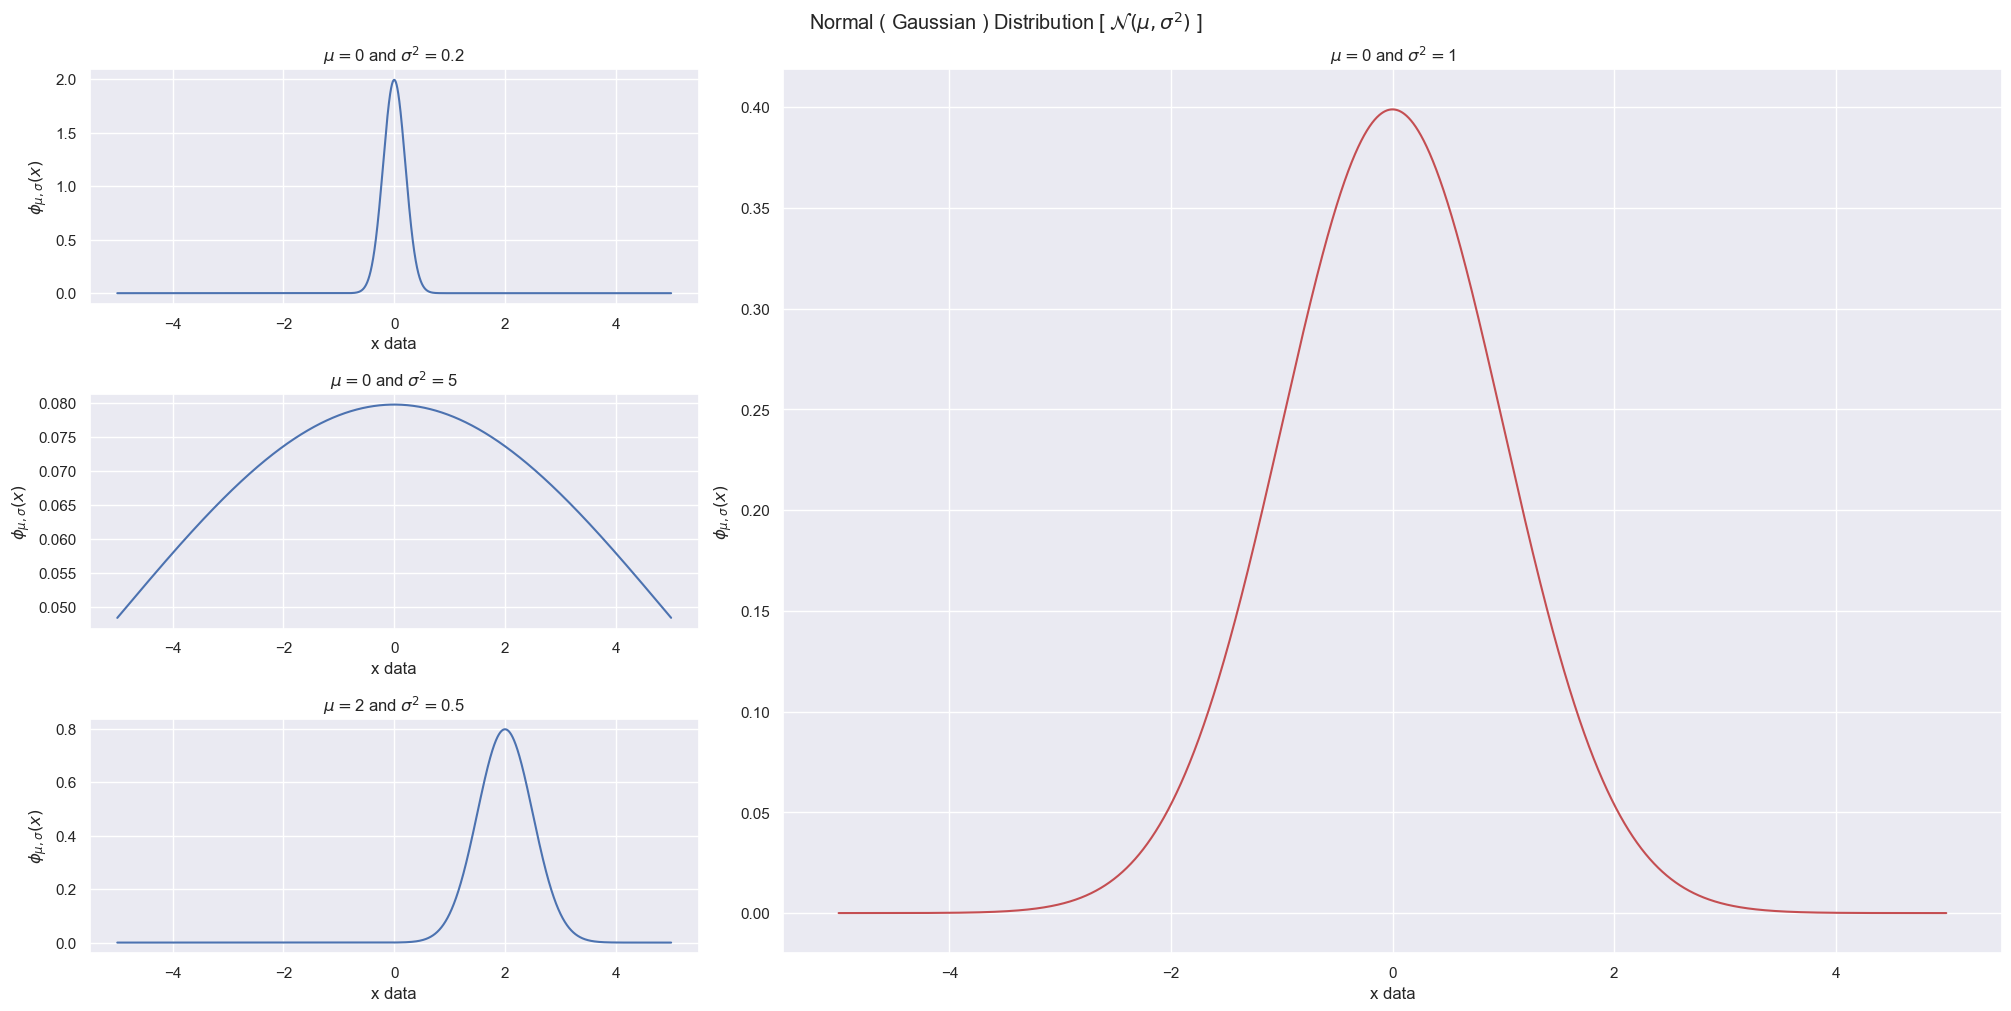

In [121]:
fig = plt.figure(figsize = (20, 10), layout="constrained")

gs = GridSpec(3, 3, figure=fig)

gs = GridSpec(3, 3, figure=fig)

ax1 = fig.add_subplot(gs[:, 1:])
ax2 = fig.add_subplot(gs[:1,:1])
ax3 = fig.add_subplot(gs[1:2,:1])
ax4 = fig.add_subplot(gs[2:,:1])

ax1.plot(x_data, stat.norm.pdf(x_data, 0, 1), 'r-')
ax2.plot(x_data, stat.norm.pdf(x_data, 0, 0.2))
ax3.plot(x_data, stat.norm.pdf(x_data, 0, 5))
ax4.plot(x_data, stat.norm.pdf(x_data, 2, 0.5))

fig.suptitle("Normal ( Gaussian ) Distribution [ $\mathcal {N}(\mu ,\sigma ^{2})$ ]")

for i, ax in enumerate(fig.axes):
    ax.set_xlabel('x data')
    ax.set_ylabel('$\phi_{\mu,\sigma} (x)$')

mean = [0,0,0,2]
var = [1,0.2,5,0.5]
ax = [ax1,ax2,ax3,ax4]

for i in range(len(ax)):
    ax[i].set_title("$\mu = $" + str(mean[i]) + " and $\sigma^2 = $" + str(var[i]))

plt.show()


#### General normal distribution

Every normal distribution is a version of the standard normal distribution, whose domain has been stretched by a factor $\sigma$  (the standard deviation) and then translated by $\mu$  (the mean value):

$$ f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sigma }}\varphi \left({\frac {x-\mu }{\sigma }}\right) $$

The probability density must be scaled by $\sigma$  so that the integral is still 1.

If $\mathcal {Z}$ is a standard normal deviate, then $ X=\sigma \mathcal {Z}+\mu $ will have a normal distribution with expected value $\mu$  and standard deviation $\sigma$ . This is equivalent to saying that the "standard" normal distribution $\mathcal {Z}$ can be scaled/stretched by a factor of 
$\sigma$  and shifted by $\mu$  to yield a different normal distribution, called $\mathcal {X}$. Conversely, if $\mathcal {X}$ is a normal deviate with parameters $\mu$  and $\sigma ^{2}$, then this $\mathcal {X}$ distribution can be re-scaled and shifted via the formula $ \mathcal {Z}=\frac{(\mathcal {X}-\mu )}{\sigma} $ to convert it to the "standard" normal distribution. This variate is also called the standardized form of $\mathcal {X}$.

#### Notation

The probability density of the standard Gaussian distribution (standard normal distribution, with zero mean and unit variance) is often denoted with the Greek letter $\phi$  (phi).The alternative form of the Greek letter phi, $\varphi$ , is also used quite often.

The normal distribution is often referred to as $\mathcal {N}(\mu ,\sigma ^{2})$ or ${\mathcal {N}}(\mu ,\sigma ^{2})$. Thus when a random variable $\mathcal {X}$ is normally distributed with mean $\mu$  and standard deviation $\sigma$ , one may write $\mathcal {X}\sim {\mathcal {N}}(\mu ,\sigma ^{2})$

#### Z-Score calculation

1. 𝑃(𝑍 < 0.85)
2. 𝑃(𝑍 > 0.85)
3. 𝑃(𝑍 > −1.37)
4. 𝑃(𝑍 < −1.37)
5. 𝑃(0.34 < 𝑍 < 1.75)
6. 𝑃(−2.69 < 𝑍 < 1.86)
7. 𝑃(−1.4 < 𝑍 < −0.6)
8. 𝑃(|𝑍| < 1.43)


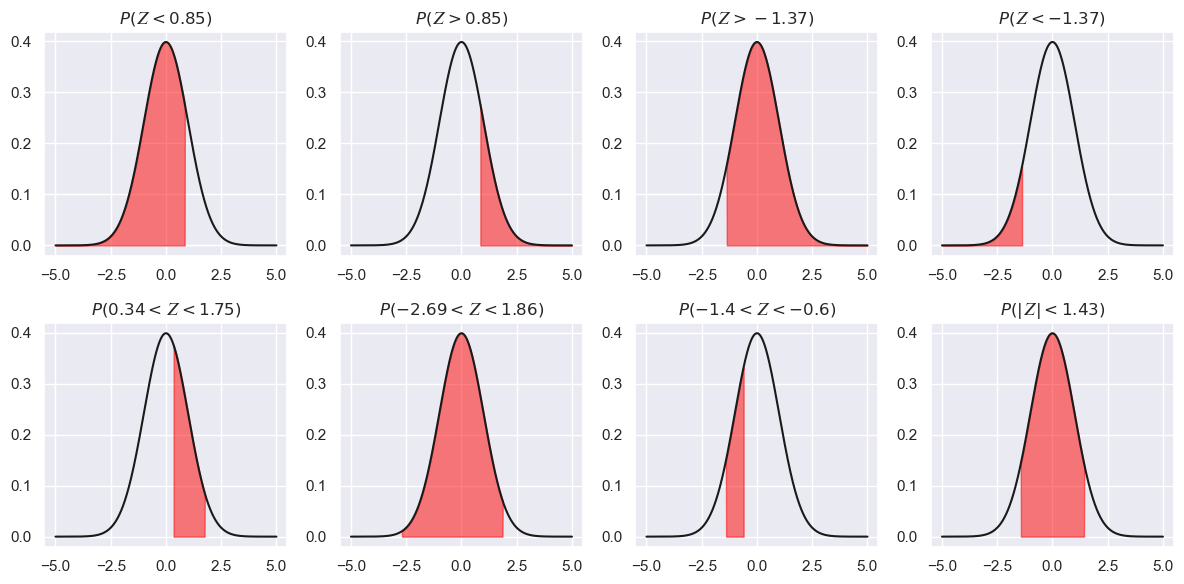

In [38]:
x = np.linspace(-5,5,1000)

title = ['$P(𝑍 < 0.85)$', '$P(𝑍 > 0.85)$', '$P(𝑍 > −1.37)$', '$P(𝑍 < −1.37)$', '$P(0.34 < 𝑍 < 1.75)$', '$P(−2.69 < 𝑍 < 1.86)$',
          '$P(−1.4 < 𝑍 < −0.6)$', '$P(|𝑍| < 1.43)$']

fig, axes = plt.subplots(2,4, figsize = (12,6))

axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.plot(x, stat.norm.pdf(x,0,1), 'k-')
    ax.set_title(title[i])

axes[0].fill_between(x,stat.norm.pdf(x,0,1), where = x<0.85, interpolate=True, color='red', alpha = 0.5)
axes[1].fill_between(x,stat.norm.pdf(x,0,1), where = x>0.85, interpolate=True, color='red', alpha = 0.5)
axes[2].fill_between(x,stat.norm.pdf(x,0,1), where = x>-1.37, interpolate=True, color='red', alpha = 0.5)
axes[3].fill_between(x,stat.norm.pdf(x,0,1), where = x < -1.37, interpolate=True, color='red', alpha = 0.5)
axes[4].fill_between(x,stat.norm.pdf(x,0,1), where = (0.34<x)&(x<1.75), interpolate=True, color='red', alpha = 0.5)
axes[5].fill_between(x,stat.norm.pdf(x,0,1), where = (-2.69 < x)&(x<1.86), interpolate=True, color='red', alpha = 0.5)
axes[6].fill_between(x,stat.norm.pdf(x,0,1), where = (-1.4 < x)&(x<-0.6), interpolate=True, color='red', alpha = 0.5)
axes[7].fill_between(x,stat.norm.pdf(x,0,1), where = (-1.43 < x)&(x<1.43), interpolate=True, color='red', alpha = 0.5)

plt.tight_layout()

plt.show()

1. 𝑃(𝑍 < 0.85)


In [23]:
stat.norm.cdf(0.85)

0.8023374568773076

2. 𝑃(𝑍 > 0.85)


In [24]:
stat.norm.sf(0.85)

0.19766254312269238

3. 𝑃(𝑍 > −1.37)

In [27]:
stat.norm.sf(-1.37)

0.914656549178033

4. 𝑃(𝑍 < −1.37)

In [28]:
stat.norm.cdf(-1.37)

0.08534345082196698

5. 𝑃(0.34 < 𝑍 < 1.75)

In [32]:
stat.norm.cdf(1.75)-stat.norm.cdf(0.34)

0.3268691071001548

6. 𝑃(−2.69 < 𝑍 < 1.86)

In [33]:
stat.norm.cdf(1.86) - stat.norm.cdf(-2.69)

0.9649846360668476

7. 𝑃(−1.4 < 𝑍 < −0.6)

In [34]:
stat.norm.cdf(-0.6)-stat.norm.cdf(-1.4)

0.19349645851630254

8. 𝑃(|𝑍| < 1.43)

In [37]:
stat.norm.cdf(1.43) - stat.norm.cdf(-1.43)

0.8472829809265217

# Central limit theorem

Suppose X is a random variable with a distribution that may be known or unknown (it can be any distribution). Using a subscript that matches the random variable, suppose:

* μX = the mean of X
* σX = the standard deviation of X

If you draw random samples of size n, then as n increases, the random variable  x̄ which consists of sample means, tends to be normally distributed and

$\mathcal {x̄}\sim {\mathcal {N}}(\mu_x ,\frac{\sigma \mathcal {X}}{\sqrt{n}})$

The central limit theorem for sample means says that if you repeatedly draw samples of a given size (such as repeatedly rolling ten dice) and calculate their means, those means tend to follow a normal distribution (the sampling distribution). As sample sizes increase, the distribution of means more closely follows the normal distribution. The normal distribution has the same mean as the original distribution and a variance that equals the original variance divided by the sample size. Standard deviation is the square root of variance, so the standard deviation of the sampling distribution is the standard deviation of the original distribution divided by the square root of n. The variable n is the number of values that are averaged together, not the number of times the experiment is done.

To put it more formally, if you draw random samples of size n, the distribution of the random variable x̄ , which consists of sample means, is called the sampling distribution of the mean. The sampling distribution of the mean approaches a normal distribution as n, the sample size, increases.

A <u>confidence interval</u> is another type of estimate but, instead of being just one number, it is an interval of numbers. It provides a range of reasonable values in which we expect the population parameter to fall. There is no guarantee that a given confidence interval does capture the parameter, but there is a predictable probability of success.

<b> The <u>Empirical Rule</u>, which applies to bell-shaped distributions, says that in approximately 95% of the samples, the sample mean,  x¯
 , will be within two standard deviations of the population mean μ. </b>

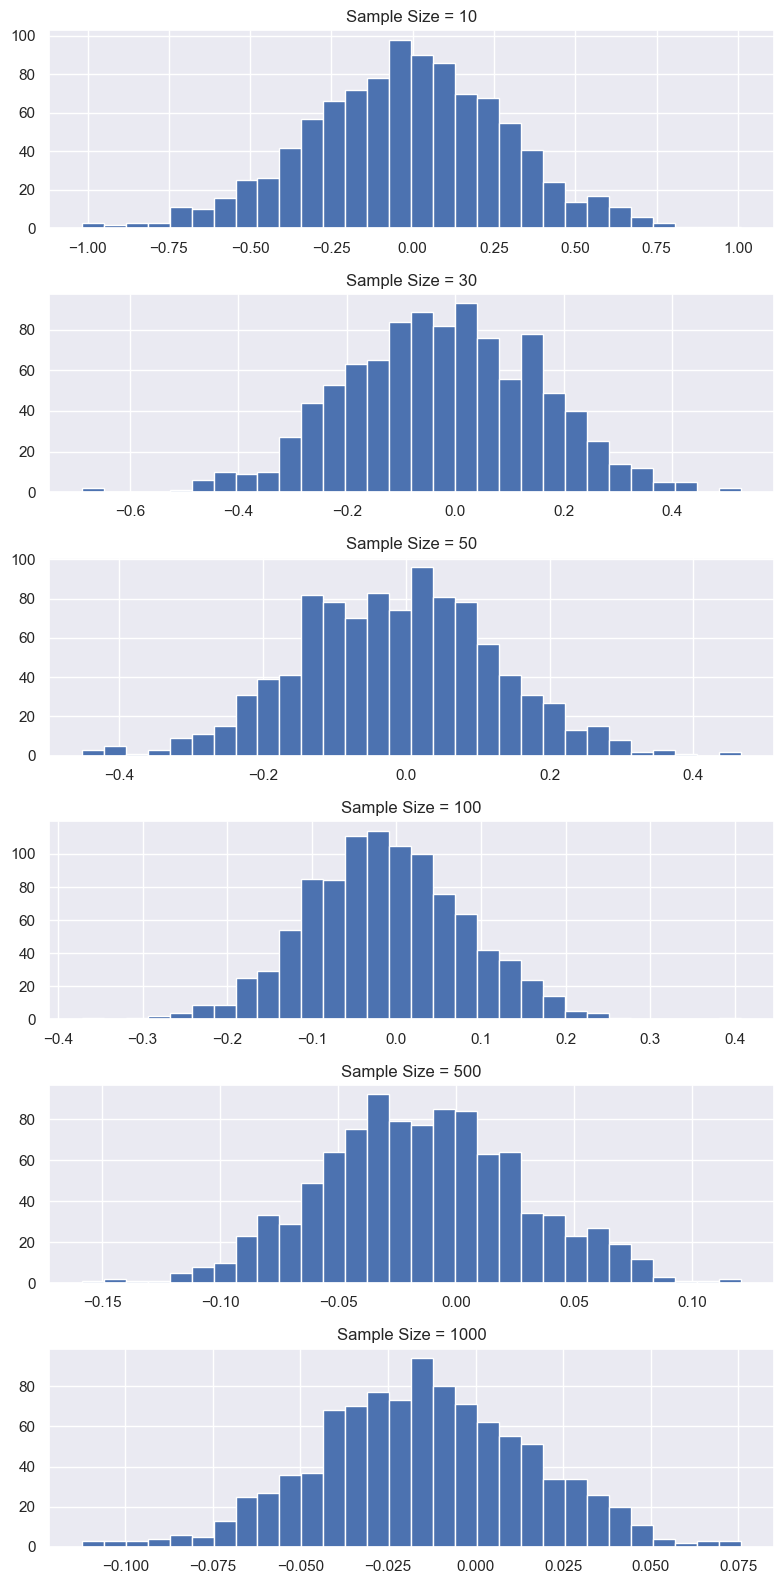

In [45]:
# Generate some random data
data = np.random.normal(0, 1, 1000)

# Calculate the sample means for different sample sizes
sample_sizes = [10, 30, 50, 100, 500, 1000]
sample_means = []
for n in sample_sizes:
    means = []
    for i in range(1000):
        sample = np.random.choice(data, size=n)
        means.append(np.mean(sample))
    sample_means.append(means)

# Plot the sampling distributions
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(8, 16))
for i, ax in enumerate(axes):
    ax.hist(sample_means[i], bins=30)
    ax.set_title("Sample Size = {}".format(sample_sizes[i]))
plt.tight_layout()
plt.show()


## Calculating the Confidence Interval

To construct a confidence interval estimate for an unknown population mean, we need data from a random sample. The steps to construct and interpret the confidence interval are:

1. Calculate the sample mean  x¯ from the sample data. Remember, in this section we already know the population standard deviation σ.
2. Find the z-score that corresponds to the confidence level.
3. Calculate the error bound EBM.
4. Construct the confidence interval.
5. Write a sentence that interprets the estimate in the context of the situation in the problem. (Explain what the confidence interval means, in the words of the problem.)

### Finding the z-score for the Stated Confidence Level

When we know the population standard deviation σ, we use a standard normal distribution to calculate the error bound EBM and construct the confidence interval. We need to find the value of z that puts an area equal to the confidence level (in decimal form) in the middle of the standard normal distribution $Z ~ N(0, 1)$.

The confidence level, CL, is the area in the middle of the standard normal distribution. CL = 1 – α, so α is the area that is split equally between the two tails. Each of the tails contains an area equal to α/2.

The z-score that has an area to the right of α/2 is denoted by $\mathcal {Z} \frac{\alpha}{2}$.

For example, when CL = 0.95, α = 0.05 and α/2 = 0.025; we write $\mathcal {Z} \frac{\alpha}{2} = \mathcal {Z}_{0.025}$.

The area to the right of $\mathcal {Z}_{0.025}$ is 0.025 and the area to the left of $\mathcal {Z}_{0.025}$ is 1 – 0.025 = 0.975.

$\mathcal {Z} \frac{\alpha}{2}$ = $\mathcal {Z}_{0.025}$ = 1.96, using a calculator, computer or a standard normal probability table.

### Calculating the Error Bound (EBM)
The error bound formula for an unknown population mean μ when the population standard deviation σ is known is

$$EBM = \left( \mathcal {Z} \frac{\alpha}{2} \right)\left( \frac{\sigma}{\sqrt{n}}\right)$$
Constructing the Confidence Interval
The confidence interval estimate has the format (x¯–EBM,x¯+EBM)
.

<b>1. Suppose scores on exams in statistics are normally distributed with an unknown population mean and a population standard deviation of three points. A random sample of 36 scores is taken and gives a sample mean (sample mean score) of 68. Find a confidence interval estimate for the population mean exam score (the mean score on all exams).

Find a 90% confidence interval for the true (population) mean of statistics exam scores. </b>

In [48]:
# Define sample data
n = 36
xbar = 68
sigma = 3

# Calculate the confidence interval
stat.t.interval(confidence=0.90, df=n-1, loc=xbar, scale=sigma/np.sqrt(n))

(67.15521377301812, 68.84478622698188)

## T Scores

When draw a simple random sample of size n from a population that has an approximately normal distribution with mean μ and unknown population standard deviation σ and calculate the t-score $$ t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$
 , then the t-scores follow a Student's t-distribution with n – 1 degrees of freedom. The t-score has the same interpretation as the z-score. It measures how far  x¯
  is from its mean μ. For each sample size n, there is a different Student's t-distribution.

  The notation for the Student's t-distribution (using T as the random variable) is:
$T \sim t_{df}$ where df = n – 1.
For example, if we have a sample of size n = 20 items, then we calculate the degrees of freedom as df = n - 1 = 20 - 1 = 19 and we write the distribution as $T ~ t_{19}$.

If the population standard deviation is not known, the error bound for a population mean is:

$$EBM = \left( \mathcal {t} \frac{\alpha}{2} \right)\left( \frac{s}{\sqrt{n}}\right)$$
 ,
$\mathcal {t} \frac{\alpha}{2}$ is the t-score with area to the right equal to  $\frac{\alpha}{2}$
 ,
use df = n – 1 degrees of freedom, and
s = sample standard deviation.
The format for the confidence interval is:
(x¯−EBM,x¯+EBM)
 .

<b>2. The Human Toxome Project (HTP) is working to understand the scope of industrial pollution in the human body. Industrial chemicals may enter the body through pollution or as ingredients in consumer products. In October 2008, the scientists at HTP tested cord blood samples for 20 newborn infants in the United States. The cord blood of the "In utero/newborn" group was tested for 430 industrial compounds, pollutants, and other chemicals, including chemicals linked to brain and nervous system toxicity, immune system toxicity, and reproductive toxicity, and fertility problems. There are health concerns about the effects of some chemicals on the brain and nervous system. Table 8.3 shows how many of the targeted chemicals were found in each infant’s cord blood.

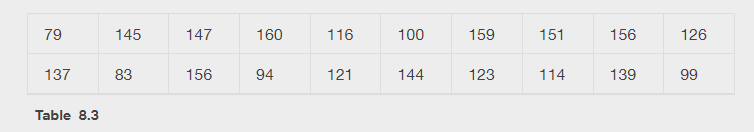

Use this sample data to construct a 90% confidence interval for the mean number of targeted industrial chemicals to be found in an in infant’s blood.

In [56]:
# prepare data
data = [79,145,147,160,116,100,159,151,156,126,137,83,156,94,121,144,123,114,139,99]

x_bar = np.mean(data)
s = np.std(data)
n = len(data)

stat.t.interval(confidence=0.90, df=n-1, loc=x_bar, scale=s/np.sqrt(n))


(117.66512861735447, 137.23487138264554)

## Hypothesis Test

A hypothesis test involves collecting data from a sample and evaluating the data. Then, the statistician makes a decision as to whether or not there is sufficient evidence, based upon analyses of the data, to reject the null hypothesis.

Hypothesis testing consists of two contradictory hypotheses or statements, a decision based on the data, and a conclusion. To perform a hypothesis test, a statistician will:

* Set up two contradictory hypotheses.
* Collect sample data.
* Determine the correct distribution to perform the hypothesis test.
* Analyze sample data by performing the calculations that ultimately will allow you to reject or decline to reject the null hypothesis.
* Make a decision and write a meaningful conclusion.

The actual test begins by considering two hypotheses. They are called the null hypothesis and the alternative hypothesis. These hypotheses contain opposing viewpoints.

$H_0$: The null hypothesis: It is a statement of no difference between the variables—they are not related. This can often be considered the status quo and as a result if you cannot accept the null it requires some action.

$H_a$: The alternative hypothesis: It is a claim about the population that is contradictory to H0 and what we conclude when we reject H0. This is usually what the researcher is trying to prove.

Since the null and alternative hypotheses are contradictory, you must examine evidence to decide if you have enough evidence to reject the null hypothesis or not. The evidence is in the form of sample data.

After you have determined which hypothesis the sample supports, you make a decision. There are two options for a decision. They are "reject H0" if the sample information favors the alternative hypothesis or "do not reject H0" or "decline to reject H0" if the sample information is insufficient to reject the null hypothesis.

Mathematical Symbols Used in $H_0$ and $H_a$:

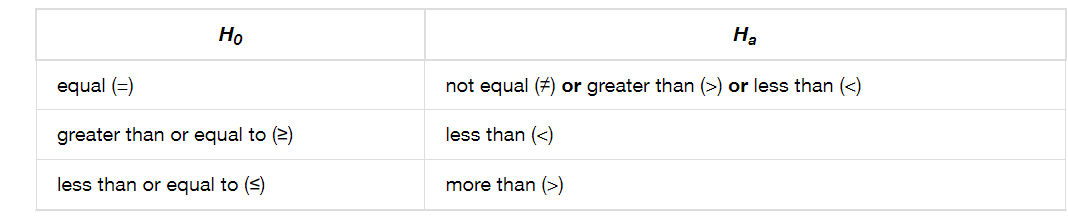



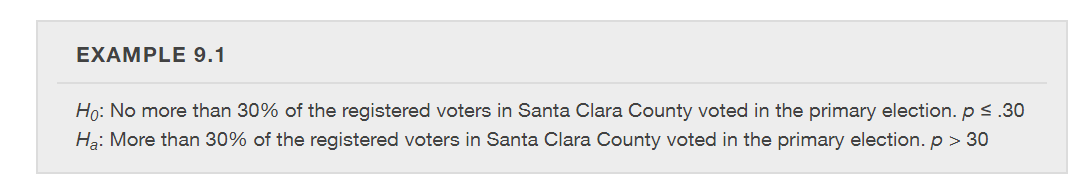

When you perform a hypothesis test, there are four possible outcomes depending on the actual truth (or falseness) of the null hypothesis H0 and the decision to reject or not. The outcomes are summarized in the following table:

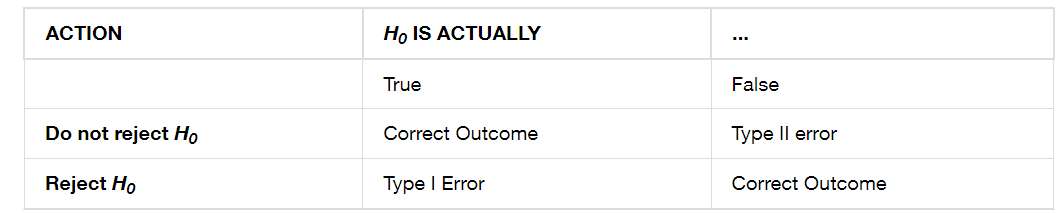

The four possible outcomes in the table are:

1. The decision is not to reject H0 when H0 is true (correct decision).
2. The decision is to reject H0 when H0 is true (incorrect decision known as aType I error).
3. The decision is not to reject H0 when, in fact, H0 is false (incorrect decision known as a Type II error).
4. The decision is to reject H0 when H0 is false (correct decision whose probability is called the Power of the Test).

Each of the errors occurs with a particular probability. The Greek letters α and β represent the probabilities.

α = probability of a Type I error = P(Type I error) = probability of rejecting the null hypothesis when the null hypothesis is true.

β = probability of a Type II error = P(Type II error) = probability of not rejecting the null hypothesis when the null hypothesis is false.

α and β should be as small as possible because they are probabilities of errors. They are rarely zero.

The Power of the Test is 1 – β. Ideally, we want a high power that is as close to one as possible. Increasing the sample size can increase the Power of the Test.

# Example:

Jeffrey, as an eight-year old, established a mean time of 16.43 seconds for swimming the 25-yard freestyle, with a standard deviation of 0.8 seconds. His dad, Frank, thought that Jeffrey could swim the 25-yard freestyle faster using goggles. Frank bought Jeffrey a new pair of expensive goggles and timed Jeffrey for 15 25-yard freestyle swims. For the 15 swims, Jeffrey's mean time was 16 seconds. Frank thought that the goggles helped Jeffrey to swim faster than the 16.43 seconds. Conduct a hypothesis test using a preset α = 0.05. Assume that the swim times for the 25-yard freestyle are normal.

$$H_0: μ = 16.43 $$
$$H_a: μ \neq 16.43$$

In [67]:
# Define sample data
n = 15
xbar = 16
sigma = 0.8
mu0 = 16.43

# Calculate the t-statistic and p-value
t_statistic = (xbar - mu0) / (sigma / (np.sqrt(n)))
#p_value = 2*stat.t.sf(abs(t_statistic), n-1)
p_value = stat.norm.cdf(t_statistic)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -2.081728548586485
p-value: 0.018683635713606015


Interpretation of the p-value: If H0 is true, there is a 0.018683635713606015 probability (1.87%)that Jeffrey's mean time to swim the 25-yard freestyle is 16 seconds or less. Because a 1.87% chance is small, the mean time of 16 seconds or less is unlikely to have happened randomly. It is a rare event.

Compare α and the p-value:

α = 0.05 p-value = 0.018683635713606015 α > p-value

Make a decision: <b><u><i>Since α > p-value, reject H0</i></u></b>.

This means that you reject μ = 16.43. In other words, you do not think Jeffrey swims the 25-yard freestyle in 16.43 seconds but faster with the new goggles.

Conclusion: At the 5% significance level, we conclude that Jeffrey swims faster using the new goggles. The sample data show there is sufficient evidence that Jeffrey's mean time to swim the 25-yard freestyle is less than 16.43 seconds.

# Example

5 reading of the resistance in ohms of a piece of wire gave the following results.

1.51, 1.49, 1.54, 1.52, 1.54

If the wire is pure silver its resistance should be 1.5ohms. If the wire is not pure then the resistance can be increased. Test at 5% level the hypothesis that the wire is pure silver. Assume that the readings are normally distributed (no details about $\sigma^2$).

$$H_0: \mu = 1.5 \\ H_1: \mu > 1.5$$

In [96]:
R = np.array([1.51, 1.49, 1.54, 1.52, 1.54])

mu_0 = 1.5

t_stat, p_value = stat.ttest_1samp(R, mu_0)

# Test the hypothesis at 5% significance level
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. The wire is not pure silver.")
else:
    print("Fail to reject the null hypothesis. The wire is pure silver.")

print("t-statistic:", T)
print("p-value:", P)

Fail to reject the null hypothesis. The wire is pure silver.
t-statistic: 2.357022603955159
p-value: 0.9824925094901688
